In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train= pd.read_csv('D:/train.csv')
train.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,43.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,31.177890,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,15.897408,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,40.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train['Survived'].value_counts() 

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

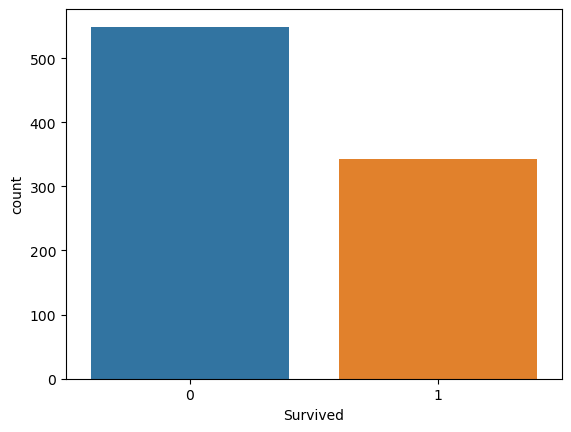

In [7]:
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

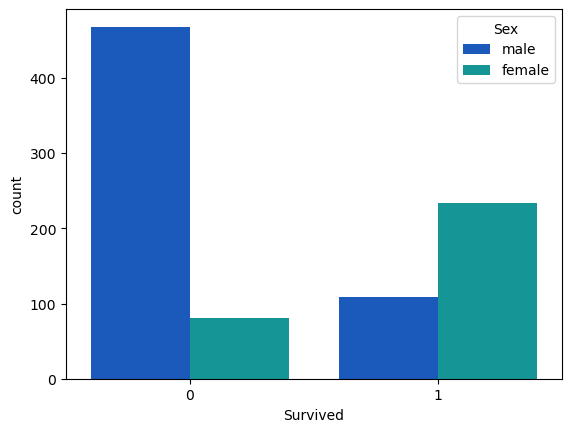

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='winter')

<Axes: ylabel='Frequency'>

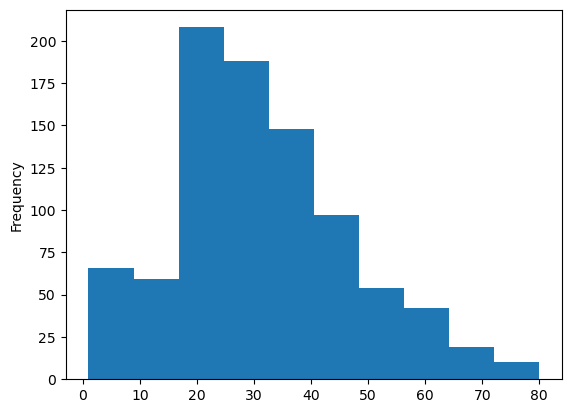

In [9]:
train['Age'].plot.hist()

D:\codealpha\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

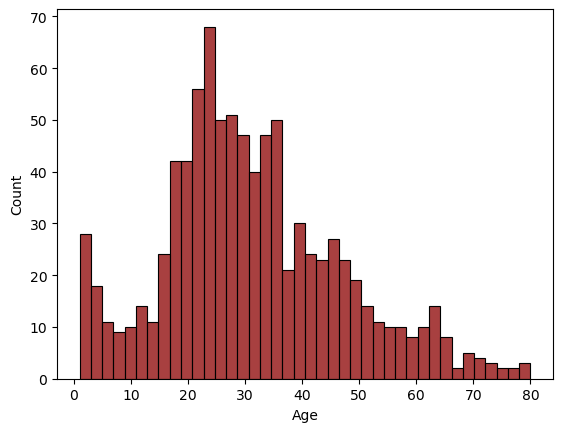

In [10]:
sns.histplot(train['Age'].dropna(),kde=False, color='darkred',bins=40)

<Axes: ylabel='Frequency'>

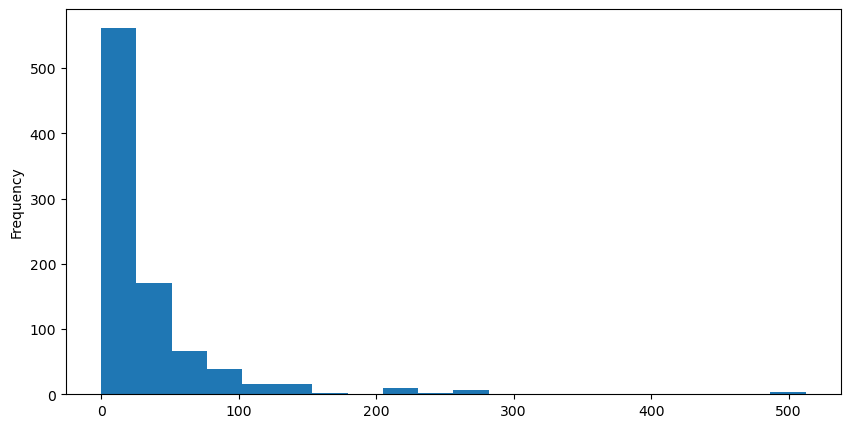

In [11]:
train['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

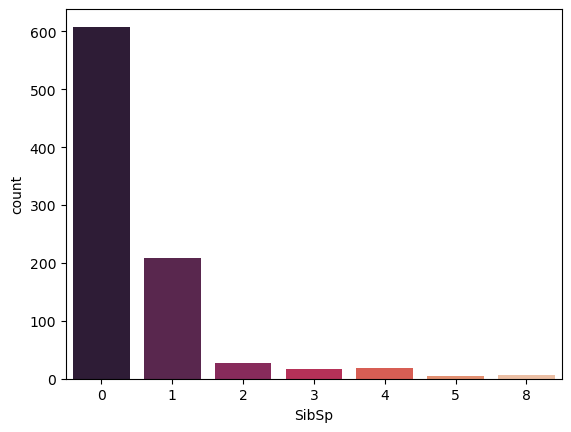

In [12]:
sns.countplot(x='SibSp', data=train, palette='rocket')

<Axes: xlabel='Parch', ylabel='count'>

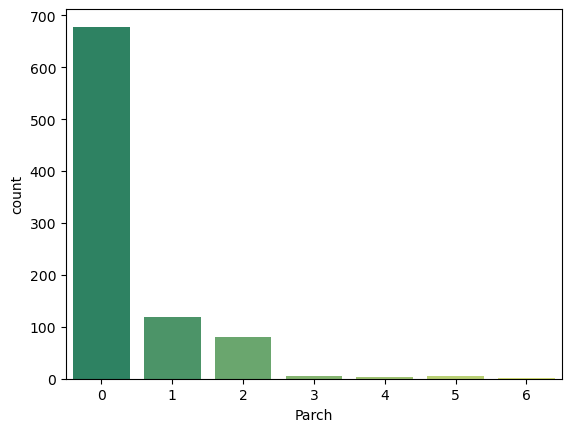

In [13]:
sns.countplot(x='Parch', data=train, palette='summer')

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

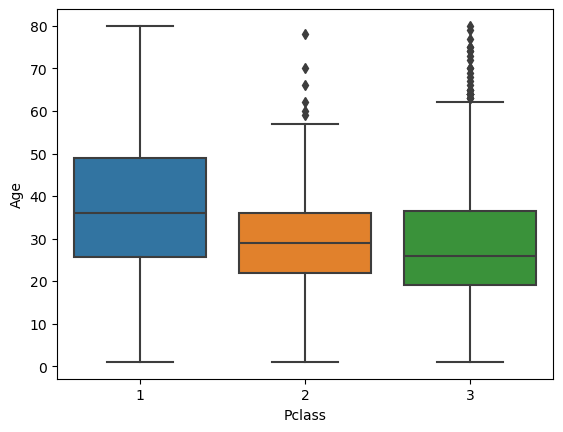

In [15]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [16]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
train.drop('Cabin',axis=1,inplace=True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [21]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:

train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [24]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [25]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.metrics import classification_report

In [29]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [30]:
for val in train:
   print(train[val].value_counts())
   print()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: count, Length: 889, dtype: int64

Survived
0    549
1    340
Name: count, dtype: int64

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

Age
24.0    34
23.0    34
22.0    31
18.0    29
28.0    29
        ..
53.0     1
72.0     1
79.0     1
77.0     1
34.5     1
Name: count, Length: 82, dtype: int64

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 247, dtype: int64

male
True     577
False    312
Name: count, dtype: int64

Q
False    812
True      77
Name: count, dtype: int64

S
True     644
False    245
Name: count, dtype: int64



In [31]:
train.shape

(889, 10)

In [32]:

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male              bool
Q                 bool
S                 bool
dtype: object

In [33]:
#Split the data into independent 'X' and dependent 'Y' variables
X = train.iloc[:, 1:8].values 
Y = train.iloc[:, 0].values 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)
  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [37]:
#Get and train all of the models
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.2559774964838256
[1]K Nearest Neighbor Training Accuracy: 0.21237693389592124
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9535864978902954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9578059071729957
[4]Gaussian Naive Bayes Training Accuracy: 0.9578059071729957
[5]Decision Tree Classifier Training Accuracy: 0.9578059071729957
[6]Random Forest Classifier Training Accuracy: 0.939521800281294


In [38]:
forest = model[6]
importances = pd.DataFrame({'feature':train.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.318
Fare,0.315
Pclass,0.089
SibSp,0.074
Survived,0.070
male,0.070
Parch,0.064


<Axes: xlabel='feature'>

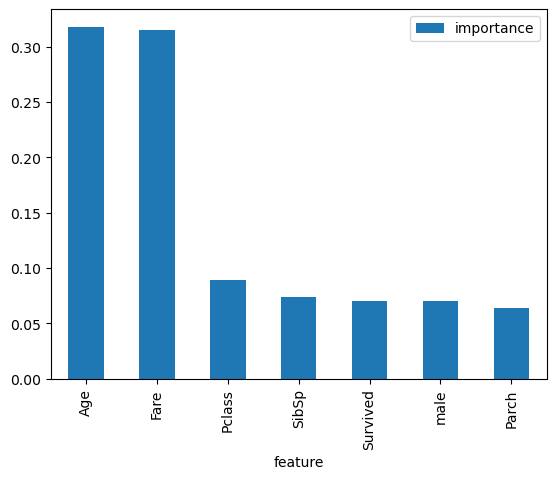

In [39]:
importances.plot.bar()

In [40]:
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[808  60 582 138 798 699 884 702 294 184 363 701 470 749  48 744 652 420
  75 312 186 311 702 735 593 297 558 299 702 175 828 450  24 781 230  13
 153 705 482   5 298 207 444 322 670 754 799 614 154 401 405 332 321 618
 121 101 328 167 809 511 824 677 329 135 132 444 808 601 832 863 337 100
 380 185  89 332 511 322 247 806 556  53 252 880  48 119 621 305 158 604
 812  48 601 591  75 247 497 416 448   4 406 782 289 843  60 441 829 580
 136 413 717 328 735  86 189 454 350 510 159 131  73 529 740 622 293 155
 271 343 223 801 837 596 703 145  13 485 133 200 312  60 533 523 541 680
 703 807 635 875 158 820 226 327 107 696 128 423 149 701 395 593 740 747
 359 739 829   3 612 258 600 578 630 121 593 222  22 481 608 290]

[ 15 160 764 742 484 263 620 708 535 550 255  32 645 146 574 354  99 568
 693 586 790 628 573 659 700  61 374  56 513 493  79 648 849 876 486 495
 455 443 414 615 499 254 636 871 458 834 366 281 198 415 565 296 479 241
 666 397 347 524 796 805   9 771 280 344 144 548 655 881 

In [41]:
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
    print("Oh no! You didn't make it")
else:
    print('Nice! You survived')

[14]
Nice! You survived
